In [1]:
from pathlib import Path
import pandas as pd
%matplotlib inline

csvpath = Path('../Resources/amd_stock_data.csv')
df = pd.read_csv(csvpath)
df.head()

,date,close,volume,open,high,low
0,4/29/09,3.51,11537950,3.40,3.56,3.38
1,4/30/09,3.61,18193730,3.55,3.73,3.53
2,5/1/09,3.82,16233940,3.55,3.90,3.55
3,5/4/09,4.26,21236940,3.90,4.30,3.83
4,5/5/09,4.32,16369170,4.36,4.39,4.11


In [2]:
df = df.drop(columns=['volume', 'open', 'high', 'low'])
df.head()

,date,close
0,4/29/09,3.51
1,4/30/09,3.61
2,5/1/09,3.82
3,5/4/09,4.26
4,5/5/09,4.32


In [3]:
df.set_index(pd.to_datetime(df['date'], infer_datetime_format=True), inplace=True)
df.head()

,date,close
date,,
2009-04-29,4/29/09,3.51
2009-04-30,4/30/09,3.61
2009-05-01,5/1/09,3.82
2009-05-04,5/4/09,4.26
2009-05-05,5/5/09,4.32


In [4]:
df = df.drop(columns='date')
df.head()

,close
date,
2009-04-29,3.51
2009-04-30,3.61
2009-05-01,3.82
2009-05-04,4.26
2009-05-05,4.32


In [5]:
daily_return = df.pct_change()
daily_return.head()

,close
date,
2009-04-29,NaN
2009-04-30,0.028490
2009-05-01,0.058172
2009-05-04,0.115183
2009-05-05,0.014085


start: 2009-04-29 00:00:00, end: 2010-04-29 00:00:00
2010-04-29 00:00:00
2012-04-28 00:00:00
2014-04-28 00:00:00
2019-04-27 00:00:00


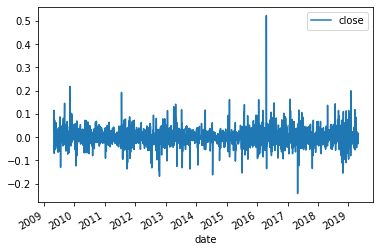

In [27]:
from datetime import timedelta
return_1year = daily_return.sort_index(ascending=True)
return_1year.head()
start = return_1year.index[0]
end = start + timedelta(365)
print(f"start: {start}, end: {end}")

ends =[]
for i in [1, 3, 5, 10]:
   end = start + timedelta(365 * i)
   ends.append(end)
   print(end)
return_1year = daily_return.loc[start:ends[0]]
return_3year = daily_return.loc[start:ends[1]]
return_5year = daily_return.loc[start:ends[2]]
return_10year = daily_return.loc[start:ends[3]]
